In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import neighbors
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import scipy


from sklearn import datasets

## Exercício - 001
Importe o conjunto de dados abaixo e utilize o método [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) para transformar a coluna _CONTENT_ em uma matriz de contagem de palavras.

https://raw.githubusercontent.com/amankharwal/Website-data/master/Youtube01-Psy.csv


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Youtube01-Psy.csv')

In [3]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [4]:
# Iniciar um objeto da classe CountVectorizer
vectorizer = CountVectorizer()

In [5]:
# Organizar o conteúdo a ser analisado
content = df.CONTENT

In [6]:
# Fazer a codificação do conteúdo utilizando vectorizer.fit_transform e salvar a matriz de contagem em 'X' (variável independente).
X = vectorizer.fit_transform(content)

## Exercício - 002
Utilize a variável _CLASS_ como variável resposta e a matriz criada acima, como variáveis preditoras, para ajustar um modelo de classificação com o método [_BernoulliNB_](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) dividindo o conjunto de dados em treinamento e teste.

In [7]:
# Definir CLASS como variável dependente
y = df.CLASS

In [8]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
# Iniciar um objeto da classe BernoulliNB como classificador.
classifier = BernoulliNB()

In [10]:
# Treinar o classificador
classifier.fit(X_train, y_train)

BernoulliNB()

## Exercício - 003
Crie uma matriz de confusão, realizando a predição no conjundo de teste gerado acima, e gere uma visualização de mapa de calor com a matriz gerada.

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
confusion_matrix = confusion_matrix(y_test, y_pred)

##### Data Checking

In [13]:
y_test.value_counts()

CLASS
1    50
0    38
Name: count, dtype: int64

In [14]:
Series = pd.Series(y_pred).value_counts()
print(Series)

1    47
0    41
Name: count, dtype: int64


##### Continuing

In [15]:
confusion_matrix_labeled = pd.DataFrame(confusion_matrix, index=['Actual 0', 'Actual 1'], 
                                        columns=['Predicted 0', 'Predicted 1'])

In [16]:
display(confusion_matrix_labeled)

,Predicted 0,Predicted 1
Actual 0,38,0
Actual 1,3,47


## Exercício - 004

Crie uma curva ROC e calcule a área abaixo da curva utilizando o método [`roc_curve`](http://lijiancheng0614.github.io/scikit-learn/auto_examples/model_selection/plot_roc.html#example-model-selection-plot-roc-py).

In [17]:
y_pred_prob = classifier.predict_proba(X_test)[:,1]

In [18]:
curva_roc = metrics.roc_curve(y_test, y_pred_prob)

In [19]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

In [20]:
roc_auc = metrics.auc(fpr, tpr)

In [21]:
print(y_pred_prob)

[7.38985009e-01 9.99997077e-01 9.62773510e-01 7.91121285e-05
 9.99979629e-01 2.36901855e-04 1.23365438e-03 8.16441319e-03
 2.25942495e-08 8.56281342e-04 8.82174484e-01 9.99999440e-01
 9.99671570e-01 1.24204792e-04 9.98034552e-01 7.74064868e-01
 9.99999999e-01 9.99998689e-01 9.99012178e-01 1.87681649e-03
 6.44077916e-06 9.97535951e-01 1.28068281e-04 8.58702493e-05
 6.88413680e-04 7.51084375e-01 6.79758621e-03 9.99955593e-01
 9.99958672e-01 3.02307366e-09 9.99981424e-01 9.96238132e-01
 9.98229151e-01 4.38114302e-05 1.10210392e-02 9.99847700e-01
 9.97957992e-01 8.06835397e-01 3.75760616e-02 9.88956773e-01
 4.92340205e-01 9.74786691e-01 9.99996293e-01 9.99616876e-01
 4.51213436e-03 9.99607230e-01 9.97868301e-01 6.97147449e-01
 9.99999474e-01 9.96684099e-01 9.99999872e-01 9.92216056e-01
 1.17539332e-04 1.46715734e-04 7.93217572e-11 2.27773999e-04
 4.94364693e-06 6.21016255e-03 9.85072799e-01 9.99999996e-01
 8.34780449e-01 4.83607064e-01 1.33113217e-06 9.99984490e-01
 9.83161295e-01 3.368543

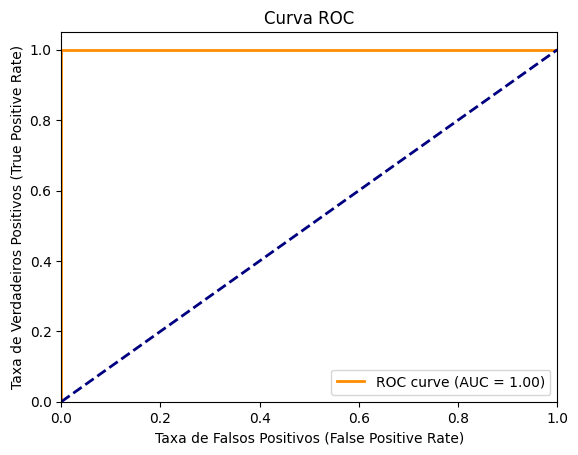

In [22]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Linha diagonal de random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (False Positive Rate)')
plt.ylabel('Taxa de Verdadeiros Positivos (True Positive Rate)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Exercício - 005
Repita o ajuste do modelo acima, contando as palavras na coluna _title_ e utilizando a coluna _category_ (variável resposta) para ajustar o modelo `MultinomialNB` para o seguinte conjunto de dados

https://raw.githubusercontent.com/amankharwal/Website-data/master/bbc-news-data.csv

Descreva com suas palavras que informações esse modelo fornece.

In [23]:
bbc_news = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/bbc-news-data.csv', sep='\t')

In [24]:
bbc_news.head(50)

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
5,business,006.txt,Japan narrowly escapes recession,Japan's economy teetered on the brink of a te...
6,business,007.txt,Jobs growth still slow in the US,The US created fewer jobs than expected in Ja...
7,business,008.txt,India calls for fair trade rules,"India, which attends the G7 meeting of seven ..."
8,business,009.txt,Ethiopia's crop production up 24%,Ethiopia produced 14.27 million tonnes of cro...
9,business,010.txt,Court rejects $280bn tobacco case,A US government claim accusing the country's ...


In [25]:
print(bbc_news['category'].value_counts())

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64


In [26]:
vectorizer_2 = CountVectorizer()

In [27]:
y = bbc_news['category']

In [28]:
X = vectorizer_2.fit_transform(bbc_news['content'])

In [29]:
classifier_2 = MultinomialNB()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
classifier_2.fit(X_train, y_train)

MultinomialNB()

In [32]:
y_pred = classifier_2.predict(X_test)

In [33]:
matriz_de_confusao = confusion_matrix(y_test, y_pred)

TypeError: 'numpy.ndarray' object is not callable

In [74]:
confusion_matrix_labeled = pd.DataFrame(matriz_de_confusao, index=classifier_2.classes_, columns=classifier_2.classes_)
display(confusion_matrix_labeled)

NameError: name 'matriz_de_confusao' is not defined

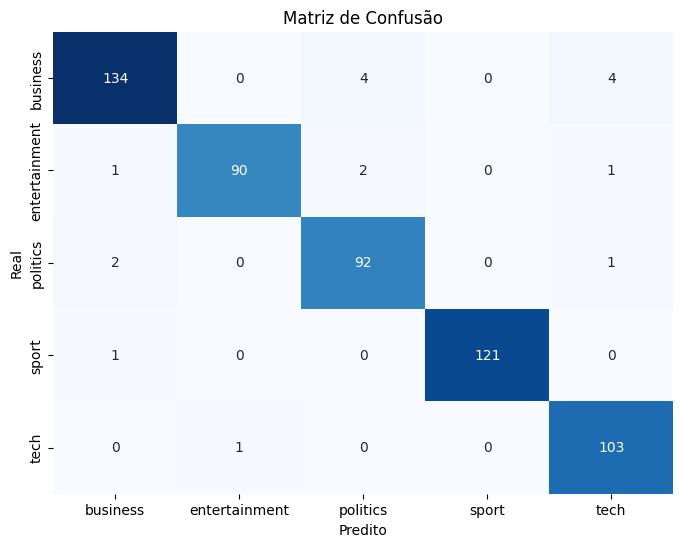

In [77]:
# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_labeled, annot=True, fmt='d', cmap='Blues', cbar = False)
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

In [34]:
classifier_2.score(X_test, y_test)

0.9694793536804309

### Exercício - 006
Crie um programa que recebe um título de uma reportagem de jornal (em inglês) e utiliza o modelo ajustado acima para predizer qual a categoria da reportagem.

In [37]:
def predict_category(titulo = str):
    titulo_tokenizado = vectorizer_2.transform([titulo])
    predicao = classifier_2.predict(titulo_tokenizado)
    return predicao[0]


print('Hello. This program takes a news title and classifies it into one of the following categories:\n 1. Politics,\n 2. Sport,\n 3. Tech,\n 4. Business,\n 5. Entertainment.\n')

if __name__ == '__main__':
    
    while True:
        user_title = input('Please enter a news title to be categorized: ')
        print(f'The news title you entered was classified as: {predict_category(user_title)}')
        
        # Tentar novamente ou encerrar o programa?
        retry = input('Do you want to try another title? (Y/N): ')
        while not (retry.upper() == 'Y' or retry.upper() == 'N'):
            retry = input('Please, enter "Y" for yes or "N" for no.')
        
        if retry.upper() == 'Y':
            continue

        else:
            break

Hello. This program takes a news title and classifies it into one of the following categories:
 1. Politics,
 2. Sport,
 3. Tech,
 4. Business,
 5. Entertainment.

The news title you entered was classified as: tech
The news title you entered was classified as: sport
The news title you entered was classified as: business
The news title you entered was classified as: entertainment
The news title you entered was classified as: business


### Exercício - 007

Crie uma função para calcular a distância euclideana:

$d(p,q)=\sqrt{(p_1-q_1)^2+(p_2-q_2)^2+...(p_n-q_n)^2}$

Onde p e q representam dois objetos para os quais se quer calcular a distância e $p_1/q_1$ até $p_n/q_n$ as características (_features_) desses objetos.

Compare o resultado da sua função com a biblioteca _scipy_. Use o conjunto de dados das _iris_ carregado abaixo.

In [75]:
def distancia_euclidiana(p, q): # p and q must be unidimensional np arrays
    return np.sqrt(np.sum((p - q)**2))

In [76]:
iris = datasets.load_iris()

iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [77]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [78]:
# Separando duas colunas para usar como exemplo

feature_1 = iris.data[:,0]
feature_2 = iris.data[:,1]

In [79]:
# Minha função:

print(distancia_euclidiana(feature_1, feature_2))

36.1578483873142


In [80]:
# Scipy:

print(scipy.spatial.distance.euclidean(feature_1, feature_2))

36.157848387314196


### Exercício - 008
Divida o conjunto de dados em treinamento e teste. Crie uma nova função, para calcular a distância (use função descrita acima) entre uma amostra no conjunto de teste para todas as amostras no conjunto de treinamento, ordernar as distâncias e retornar as amostras de _k_ menores distâncias, com o seu rótulo (_label_ ou _target_), onde _k_ é um parâmetro ajustavel pelo usuário da sua função.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

In [82]:
def k_vizinhos_mais_proximos(X_train, y_train, amostra_teste, k = 3):
    distancias = []
    
    # Calcular a distância euclidiana entre a amostra de teste e cada amostra de treinamento
    for i in range(len(X_train)):
        distancia = distancia_euclidiana(amostra_teste, X_train[i])
        distancias.append((distancia, y_train[i]))  # Armazena a distância e o rótulo correspondente
    
    # Ordenar as distâncias em ordem crescente
    distancias_ordenadas = sorted(distancias, key=lambda x: x[0])
    
    # Retornar os _k_ primeiros vizinhos (menores distâncias) e seus rótulos
    return distancias_ordenadas[:k]

In [84]:
amostra_teste = X_test[20]
vizinhos = k_vizinhos_mais_proximos(X_train, y_train, X_test[20], k = 5)

print(f"Amostra de teste: {amostra_teste}")
print(f"Vizinhos mais próximos (distância, rótulo): {vizinhos}")

Amostra de teste: [4.7 3.2 1.6 0.2]
Vizinhos mais próximos (distância, rótulo): [(0.17320508075688812, 0), (0.22360679774997935, 0), (0.24494897427831802, 0), (0.30000000000000004, 0), (0.31622776601683805, 0)]


### Exercício - 009
Crie uma função, que a partir dos vizinhos mais próximos de uma amostra, atribuí a classe da amostra, como a classe mais frequente entre os vizinhos. Utilize as funções criadas acima.

In [92]:
def atribuir_classe(X_train, y_train, amostra_teste, k=3):
    
    vizinhos = k_vizinhos_mais_proximos(X_train, y_train, amostra_teste, k)
    # print(vizinhos) # debug

    classes = [rotulo for distancia, rotulo in vizinhos]
    # print(classes) # debug

    counter = {}
    
    for classe in classes:
        if classe in counter:
            counter[classe] += 1
        else:
            counter[classe] = 1

    # print(counter) # debug

    classe_mais_frequente = None
    maior_frequencia = 0

    for classe, frequencia in counter.items():
        if frequencia > maior_frequencia:
            maior_frequencia = frequencia
            classe_mais_frequente = classe
    
    return classe_mais_frequente


atribuir_classe(X_train, y_train, X_test[3], k=10)

1

### Exercício - 010
Obtenha a acurácia do seu modelo, e compare com a implementação do _sklearn_.

In [93]:
corretos = 0

for amostra, gabarito in zip(X_test, y_test):
    
    predito, correto = atribuir_classe(X_train, y_train, amostra, k = 3), gabarito
    # print(predito, correto) # debug

    if predito == correto:
        corretos += 1

print(f'A acurária é de {corretos/len(X_test)}')

A acurária é de 1.0


In [88]:
clf = neighbors.KNeighborsClassifier()

In [89]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [90]:
clf.score(X_test, y_test)

1.0

### Exercício - 011
Crie uma função que recebe um conjunto de treinamento (com duas dimensões, duas características), um ponto para teste (com duas dimensões, duas características), utiliza o programa criado acima para atribuir a classe e produz um gráfico em 2 dimensões com o novo ponto classificado.

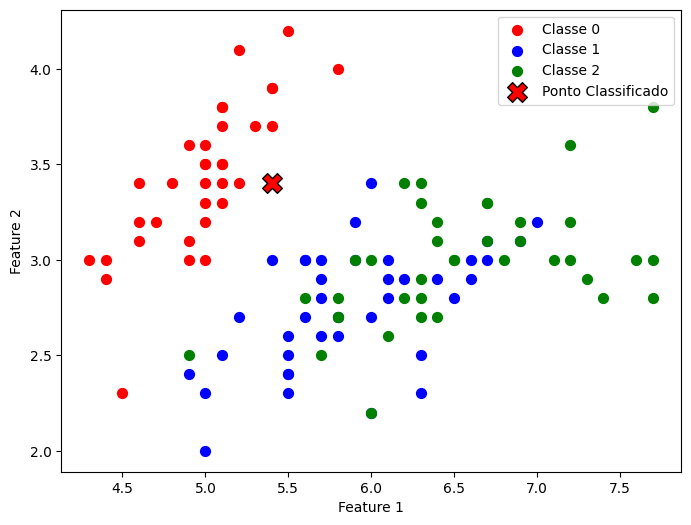

In [101]:
def plot_classification(X_train, y_train, ponto_teste, k=3):
    
    classe_ponto_teste = atribuir_classe(X_train, y_train, ponto_teste, k)
    todas_classes = np.unique(y_train)
    

    cores = ['red', 'blue', 'green']  # Escolha de cores para cada classe
    
    plt.figure(figsize=(8, 6))
    
    # Plotar os pontos de treinamento com base nas classes
    for idx, classe in enumerate(todas_classes):
        plt.scatter(
            X_train[y_train == classe, 0], X_train[y_train == classe, 1],
            color=cores[idx], label=f'Classe {classe}', s=50
        )
    
    # Plotar o ponto de teste com a cor da classe atribuída
    plt.scatter(ponto_teste[0], ponto_teste[1], color=cores[classe_ponto_teste], 
                edgecolor='black', label='Ponto Classificado', s=200, marker='X')
    
    # Adicionar rótulos e título
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    
    # Mostrar o gráfico
    plt.show()

# Testando
X_train_2d = X_train[:, :2]  # Selecionando apenas as primeiras 2 dimensões do conjunto de treinamento
ponto_teste = X_test[5, :2]  # Selecionando apenas as primeiras 2 dimensões do ponto de teste

plot_classification(X_train_2d, y_train, ponto_teste, k=3)
